In [61]:
import sys
import subprocess
import re
import os
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cmath
import operator
import random
import matplotlib.cm as cm
import vtk

## import MI measures
from mi_functions import *

In [62]:
# ## load vti data
file1 = 'Data/Isabel_vti/isabel_p_25.vti'
file2 = 'Data/Isabel_vti/isabel_vel_25.vti'
arrayName1 = 'ImageFile'
arrayName2 = 'Velocity'

R1 = vtk.vtkXMLImageDataReader()
R1.SetFileName(file1)
R1.Update()
dataArray1 = R1.GetOutput().GetPointData().GetArray(arrayName1)

R2 = vtk.vtkXMLImageDataReader()
R2.SetFileName(file2)
R2.Update()
dataArray2 = R2.GetOutput().GetPointData().GetArray(arrayName2)

var1=np.zeros(dataArray1.GetNumberOfTuples()) 
var2=np.zeros(dataArray1.GetNumberOfTuples()) 

for i in range(dataArray1.GetNumberOfTuples()):
    var1[i] = dataArray1.GetTuple1(i)
    var2[i] = dataArray2.GetTuple1(i)

dims = R1.GetOutput().GetDimensions()

In [66]:
## compute histogram
numBins=256
numSamples = np.shape(var1)[0]
Array1 = np.histogram(var1,bins=numBins)[0]
Array2 = np.histogram(var2,bins=numBins)[0]
ArrayComb = np.histogram2d(var1,var2,bins=numBins)[0]

## compute SMI
I11,I12,I21,I22,I31,I32 = compute_specific_mutual_information(Array1,Array2,ArrayComb,numSamples,numBins)
## compute PMI
PMI = compute_pointwise_mutual_information(Array1,Array2,ArrayComb,numSamples,numBins)

(array([ 19533.00000,  5837.00000,  10097.00000,  14228.00000,
         18793.00000,  22801.00000,  28101.00000,  32179.00000,
         35625.00000,  38828.00000,  42147.00000,  46573.00000,
         50738.00000,  54694.00000,  56538.00000,  58385.00000,
         61891.00000,  64625.00000,  66414.00000,  67839.00000,
         69069.00000,  69594.00000,  70334.00000,  70622.00000,
         70005.00000,  68491.00000,  67466.00000,  66187.00000,
         64580.00000,  62496.00000,  60932.00000,  58579.00000,
         57329.00000,  56014.00000,  53887.00000,  52373.00000,
         50121.00000,  48564.00000,  46749.00000,  44776.00000,
         41854.00000,  40019.00000,  39518.00000,  37613.00000,
         35121.00000,  33989.00000,  32964.00000,  31890.00000,
         30608.00000,  29683.00000,  29073.00000,  27449.00000,
         26080.00000,  24619.00000,  23188.00000,  21955.00000,
         21002.00000,  20564.00000,  20380.00000,  19966.00000,
         19162.00000,  18549.00000,  1808

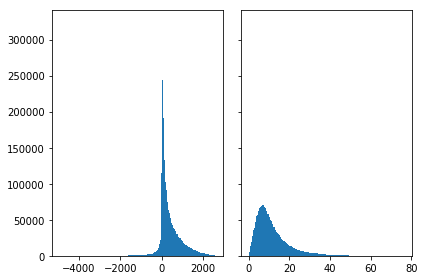

In [73]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(var1, bins=numBins)
axs[1].hist(var2, bins=numBins)

[ 0.28495  0.03325  0.02603  0.02336  0.02326  0.02098  0.01878  0.01579
  0.01403  0.01164  0.01094  0.01088  0.01027  0.01061  0.01035  0.00990
  0.00969  0.00882  0.00813  0.00707  0.00685  0.00608  0.00547  0.00429
  0.00366  0.00249  0.00184  0.00141  0.00053  0.00000  0.00010  0.00067
  0.00087  0.00128  0.00200  0.00228  0.00287  0.00371  0.00353  0.00348
  0.00340  0.00360  0.00382  0.00409  0.00462  0.00363  0.00396  0.00480
  0.00570  0.00663  0.00724  0.00822  0.00664  0.00579  0.00491  0.00447
  0.00428  0.00470  0.00493  0.00559  0.00589  0.00701  0.00770  0.00993
  0.00963  0.00959  0.00864  0.01054  0.01076  0.01233  0.01394  0.01552
  0.01831  0.02040  0.02284  0.02463  0.02577  0.02846  0.03185  0.02891
  0.03206  0.03408  0.03547  0.03897  0.04020  0.04243  0.04316  0.04600
  0.04825  0.04959  0.04914  0.05554  0.05847  0.05939  0.06099  0.06461
  0.06329  0.06988  0.07215  0.07816  0.07752  0.07727  0.08268  0.08382
  0.09012  0.09276  0.09408  0.09975  0.10200  0.10

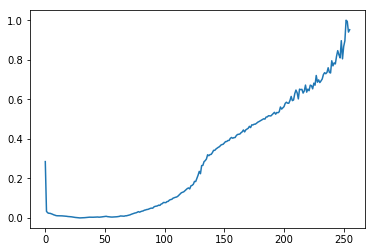

In [72]:
I = I12
Array = Array2
var = var2
############################

#normalize I
minval = np.min(I)
maxval = np.max(I)
I = (I-minval)/(maxval-minval)

np.set_printoptions(formatter={'float': '{: 0.5f}'.format})
print I
print Array
plt.plot(I)

percentageToStroe = 2

totPts =  int(np.sum(Array*I))

ptsNeeded = int((len(var1)*percentageToStroe)/100.00)
print 'ptsNeeded: ' + str(ptsNeeded) + ' pts may come without adjustment: ' + str(totPts)

percentageShortage = 0
if(ptsNeeded > totPts):
    percentageShortage = ((ptsNeeded-totPts)/float(len(var)))*100

print 'percentage Shortage: ' + str(percentageShortage)

In [69]:
I_dict = {}
keys = range(numBins)
for i in keys:
    I_dict[i] = I[i]
    
I_dict_sorted = list(reversed(sorted(I_dict.items(), key=operator.itemgetter(1))))
print I_dict_sorted

[(252, 1.0), (253, 0.9943511874211256), (255, 0.9520059802294589), (254, 0.9400835868108056), (248, 0.8966545096788248), (251, 0.8961395957063627), (250, 0.8673221908895599), (245, 0.8461386976505952), (246, 0.8255617628600623), (244, 0.8173552706592598), (247, 0.8094887153508544), (249, 0.804763311465764), (240, 0.7950201436240988), (242, 0.784440851892809), (243, 0.7788839411905574), (241, 0.7691137748766209), (237, 0.7596219897061283), (238, 0.7363820467075358), (236, 0.7359081592970826), (234, 0.7348325963054799), (239, 0.7331056409933636), (235, 0.7294726521203888), (233, 0.7250270251733135), (227, 0.7205365714947392), (232, 0.7025916808301534), (229, 0.6982319298838656), (231, 0.6931081765830688), (228, 0.686660983016547), (230, 0.6846327715885284), (225, 0.6816978817151804), (218, 0.6720425351317744), (222, 0.6716327930365198), (226, 0.6714726332857549), (223, 0.6689203831389163), (224, 0.6529290219994174), (220, 0.6516082558461456), (213, 0.6514057065821851), (215, 0.6505136152